<a href="https://colab.research.google.com/github/ksg98/ECS289G-Advance-NLP/blob/master/rq1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Research Question 1: Can the initial activity patterns in projects predict their long-term success?

#### Objectives
- Evaluate if early activity patterns, such as frequency of commits, number of contributors, and initial codebase size, can predict project success.

#### Approach
1. **Define Initial Activity Time Frame:** Establish a specific time frame for "initial activity" (e.g., first three months) to analyze.
2. **Data Preparation:** Use the commit and filelist datasets to extract relevant metrics for the initial activity period.
3. **Metrics of Interest:**
   - Frequency of commits
   - Number of contributors
   - Initial codebase size (e.g., number of files or lines of code)
4. **Long-term Outcomes:** Compare these early activity metrics against long-term outcomes (e.g., project graduation, active status, or retirement).

#### Analysis Steps
1. **Data Extraction:** For each project, extract metrics related to commits, contributors, and codebase size during the defined initial activity period.
2. **Outcome Measurement:** Determine the long-term success of each project based on predefined criteria (e.g., graduation from incubation).
3. **Statistical Analysis:** Use regression or classification models to evaluate if early activity patterns are significant predictors of long-term success.
4. **Model Evaluation:** Assess the predictive power of the model using appropriate metrics (e.g., R-squared, accuracy, F1 score).

#### Next Steps
- Begin by defining the specific time frame for initial activity and extracting relevant data for analysis.


In [ ]:
import pandas as pd

# Load each dataset to describe them individually
people_df = pd.read_csv('people_2019_8.csv')
lists_df = pd.read_csv('lists_2019_8.csv', encoding='ISO-8859-1')
aliases_df = pd.read_csv('aliases_2019_8.csv')
filelist_df = pd.read_csv('filelist_2019_8.csv')
commits_df = pd.read_csv('commits_2019_8.csv')
messages_df = pd.read_csv('messages_2019_8.csv')

# Describe each dataset
people_description = people_df.describe(include='all')
lists_description = lists_df.describe(include='all')
aliases_description = aliases_df.describe(include='all')
filelist_description = filelist_df.describe(include='all')
commits_description = commits_df.describe(include='all')
messages_description = messages_df.describe(include='all')

(people_description, lists_description, aliases_description, filelist_description, commits_description, messages_description)

C:\Users\karam\AppData\Local\Temp\ipykernel_5156\559299391.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  commits_df = pd.read_csv('commits_2019_8.csv')


(            personid    name  isdev hasemail
 count   33895.000000   33892  33895    33895
 unique           NaN   33643      1        1
 top              NaN  ??????      f        f
 freq             NaN      36  33895    33895
 mean    16951.094409     NaN    NaN      NaN
 std      9785.739103     NaN    NaN      NaN
 min         1.000000     NaN    NaN      NaN
 25%      8477.500000     NaN    NaN      NaN
 50%     16951.000000     NaN    NaN      NaN
 75%     25425.500000     NaN    NaN      NaN
 max     33899.000000     NaN    NaN      NaN,
             listid   listname   pj_alias      status start_date    end_date  \
 count   312.000000        312        312  312.000000        312         264   
 unique         NaN        312        312         NaN        291         201   
 top            NaN  Amaterasu  amaterasu         NaN  6/13/2011  11/18/2015   
 freq           NaN          1          1         NaN          3           4   
 mean    156.500000        NaN        NaN    1.

In [ ]:
import pandas as pd

# Load the dataset
people_df = pd.read_csv('people_2019_8.csv')

# Display basic information and the first few rows of the dataframe
people_info = people_df.info()
people_head = people_df.head()

people_info, people_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33895 entries, 0 to 33894
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   personid  33895 non-null  int64 
 1   name      33892 non-null  object
 2   isdev     33895 non-null  object
 3   hasemail  33895 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


(None,
    personid                  name isdev hasemail
 0         1      Benjamin Hindman     f        f
 1         2  Lewis John McGibbney     f        f
 2         3         Andy Seaborne     f        f
 3         4          Brett Porter     f        f
 4         5          Olivier Lamy     f        f)

In [ ]:
lists_df = pd.read_csv('lists_2019_8.csv', encoding='ISO-8859-1')

# Display the head, info, and describe of the lists dataset
lists_head = lists_df.head()
lists_info = lists_df.info()
lists_describe = lists_df.describe()

(lists_head, lists_info, lists_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listid               312 non-null    int64  
 1   listname             312 non-null    object 
 2   pj_alias             312 non-null    object 
 3   status               312 non-null    int64  
 4   start_date           312 non-null    object 
 5   end_date             264 non-null    object 
 6   dev_is_available     312 non-null    object 
 7   commit_is_available  312 non-null    object 
 8   is_in_attic          312 non-null    object 
 9   sponsor              312 non-null    object 
 10  intro                312 non-null    object 
 11  istoplv              0 non-null      float64
 12  start_from_scratch   0 non-null      float64
 13  pj_url               312 non-null    object 
 14  pj_github_url        312 non-null    object 
dtypes: float64(2), int64(2), object(11)
memo

(   listid   listname   pj_alias  status  start_date end_date dev_is_available  \
 0       1  Amaterasu  amaterasu       0    9/7/2017      NaN                t   
 1       2  Annotator  annotator       0   8/30/2016      NaN                t   
 2       3    BatchEE    batchee       0   10/3/2013      NaN                t   
 3       4       BRPC       brpc       0  11/13/2018      NaN                t   
 4       5      Crail      crail       0   11/1/2017      NaN                t   
 
   commit_is_available is_in_attic  \
 0                   t           f   
 1                   t           f   
 2                   t           f   
 3                   f           f   
 4                   t           f   
 
                                              sponsor  \
 0  Incubator\n\t\t\n\t\t(Jean-Baptiste OnofrÃ©)\n...   
 1  Incubator\n\t\t\n\t\t(Daniel Gruno)\n\t\t \n\t      
 2         Incubator\n\t\t\n\t\t(FIXME)\n\t\t \n\t      
 3                            Incubator\n\t\t \n

In [ ]:
filelist_df = pd.read_csv('filelist_2019_8.csv')

# Display the head, info, and describe of the filelist dataset
filelist_head = filelist_df.head()
filelist_info = filelist_df.info()
filelist_describe = filelist_df.describe()

(filelist_head, filelist_info, filelist_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877112 entries, 0 to 8877111
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   list       int64 
 1   filename   object
 2   fileid     int64 
 3   isremoved  object
dtypes: int64(2), object(2)
memory usage: 270.9+ MB


(   list                                           filename  fileid isremoved
 0   208  incubator/servicemix/branches/osgi/servicemix-...  220953         f
 1   208  incubator/servicemix/branches/osgi/servicemix-...  220954         f
 2   208  incubator/servicemix/branches/osgi/servicemix-...  220955         f
 3   208  incubator/servicemix/branches/osgi/servicemix-...  220956         f
 4   208  incubator/servicemix/branches/osgi/servicemix-...  220957         f,
 None,
                list        fileid
 count  8.877112e+06  8.877112e+06
 mean   1.776579e+02  3.420200e+05
 std    6.706916e+01  4.928117e+05
 min    1.000000e+00  1.000000e+00
 25%    1.300000e+02  1.558100e+04
 50%    1.960000e+02  8.448900e+04
 75%    2.380000e+02  5.006010e+05
 max    3.120000e+02  1.988648e+06)

In [ ]:
commits_df = pd.read_csv('commits_2019_8.csv')

# Display the head, info, and describe of the commits dataset
commits_head = commits_df.head()
commits_info = commits_df.info()
commits_describe = commits_df.describe()

(commits_head, commits_info, commits_describe)

C:\Users\karam\AppData\Local\Temp\ipykernel_5156\2996016021.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  commits_df = pd.read_csv('commits_2019_8.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655492 entries, 0 to 3655491
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   list             int64  
 1   messageid        object 
 2   committerid      int64  
 3   commit_datetime  object 
 4   file_operation   object 
 5   file_name        object 
 6   addlines         int64  
 7   dellines         int64  
 8   id               int64  
 9   file_id          int64  
 10  authorid         int64  
 11  author_datetime  object 
 12  c_peopleid       float64
 13  a_peopleid       float64
 14  sha_or_rev       object 
 15  format           object 
 16  datetime         object 
dtypes: float64(2), int64(7), object(8)
memory usage: 474.1+ MB


(   list                                        messageid  committerid  \
 0    54  4bcd9b14562c4e8aaf27d4a329d4cd7d@git.apache.org         2846   
 1    54  4bcd9b14562c4e8aaf27d4a329d4cd7d@git.apache.org         2846   
 2    54  4bcd9b14562c4e8aaf27d4a329d4cd7d@git.apache.org         2846   
 3    54  cd48319ce8b04648b598a5ccee513834@git.apache.org         2846   
 4    54  cd48319ce8b04648b598a5ccee513834@git.apache.org         2846   
 
           commit_datetime file_operation  \
 0  2018-08-29 13:25:07-07            add   
 1  2018-08-29 13:25:07-07            mod   
 2  2018-08-29 13:25:07-07            mod   
 3  2018-08-29 13:25:14-07            add   
 4  2018-08-29 13:25:14-07            add   
 
                                            file_name  addlines  dellines  \
 0  git-wip-us.apache.org/repos/asf/incubator-airf...       390         0   
 1  git-wip-us.apache.org/repos/asf/incubator-airf...        25        39   
 2  git-wip-us.apache.org/repos/asf/incubator-airf.

In [ ]:
# Load the sixth dataset: messages with specified encoding
messages_df = pd.read_csv('messages_2019_8.csv')

# Display the head, info, and describe of the messages dataset
messages_head = messages_df.head()
messages_info = messages_df.info()
messages_describe = messages_df.describe()

(messages_head, messages_info, messages_describe)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451541 entries, 0 to 1451540
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   numid          1451541 non-null  int64  
 1   list           1451541 non-null  int64  
 2   messageid      1451540 non-null  object 
 3   senderaliasid  1451541 non-null  int64  
 4   senderalias    1451541 non-null  object 
 5   referenceid    990628 non-null   object 
 6   recipaliasid   670952 non-null   float64
 7   recipalias     670951 non-null   object 
 8   datetime       1451541 non-null  object 
 9   subject        1451507 non-null  object 
 10  body           1451276 non-null  object 
 11  from_commit    1451541 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 132.9+ MB


(    numid  list                                          messageid  \
 0   19615    54  JIRA.12965744.1462571211000.33745.146505689919...   
 1   19616    54  JIRA.12965744.1462571211000.33748.146505695918...   
 2   19617    54  JIRA.12965744.1462571211000.33825.146506001916...   
 3   19618    54  JIRA.12975651.1464993953000.33830.146506019918...   
 4  666938    23  CA+tQj+V184OvSNZOJUpoSZ_knEEvKi0zcU6o8TUsFnaXe...   
 
    senderaliasid                             senderalias  \
 0           1317  ASF subversion and git services (JIRA)   
 1           1277                   Jeremiah Lowin (JIRA)   
 2           1273                  Chris Riccomini (JIRA)   
 3           1317  ASF subversion and git services (JIRA)   
 4          25072                slack-milagro-dev-apache   
 
                                   referenceid  recipaliasid recipalias  \
 0  JIRA.12965744.1462571211000@Atlassian.JIRA           NaN        NaN   
 1  JIRA.12965744.1462571211000@Atlassian.JIRA        

In [ ]:
commits_df['commit_datetime'] = pd.to_datetime(commits_df['commit_datetime'], errors='coerce')

# Display the head of the dataframe to confirm loading and conversion
commits_df.head()

C:\Users\karam\AppData\Local\Temp\ipykernel_5156\1642441146.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  commits_df['commit_datetime'] = pd.to_datetime(commits_df['commit_datetime'], errors='coerce')


,list,messageid,committerid,commit_datetime,file_operation,file_name,addlines,dellines,id,file_id,authorid,author_datetime,c_peopleid,a_peopleid,sha_or_rev,format,datetime
0,54,4bcd9b14562c4e8aaf27d4a329d4cd7d@git.apache.org,2846,2018-08-29 13:25:07-07:00,add,git-wip-us.apache.org/repos/asf/incubator-airf...,390,0,9413,8743,2846,2018-08-29 13:25:07-07,NaN,NaN,NaN,git,2018-08-29 13:25:07-07
1,54,4bcd9b14562c4e8aaf27d4a329d4cd7d@git.apache.org,2846,2018-08-29 13:25:07-07:00,mod,git-wip-us.apache.org/repos/asf/incubator-airf...,25,39,9414,8744,2846,2018-08-29 13:25:07-07,NaN,NaN,NaN,git,2018-08-29 13:25:07-07
2,54,4bcd9b14562c4e8aaf27d4a329d4cd7d@git.apache.org,2846,2018-08-29 13:25:07-07:00,mod,git-wip-us.apache.org/repos/asf/incubator-airf...,20,36,9415,8745,2846,2018-08-29 13:25:07-07,NaN,NaN,NaN,git,2018-08-29 13:25:07-07
3,54,cd48319ce8b04648b598a5ccee513834@git.apache.org,2846,2018-08-29 13:25:14-07:00,add,git-wip-us.apache.org/repos/asf/incubator-airf...,400,0,9416,8746,2846,2018-08-29 13:25:14-07,NaN,NaN,NaN,git,2018-08-29 13:25:14-07
4,54,cd48319ce8b04648b598a5ccee513834@git.apache.org,2846,2018-08-29 13:25:14-07:00,add,git-wip-us.apache.org/repos/asf/incubator-airf...,301,0,9417,8747,2846,2018-08-29 13:25:14-07,NaN,NaN,NaN,git,2018-08-29 13:25:14-07


The commits dataset has been successfully loaded and the commit_datetime column has been converted to a datetime object for easier manipulation. Next, we'll proceed with the analysis for RQ1 by performing the following steps:

Identify the Start Date for Each Project:
We need to determine the start date for each project to identify the initial activity window. This information might be derived from the earliest commit datetime per project if project start dates are not explicitly available in the provided datasets.

Define the Initial Activity Window:
For the purpose of this analysis, we'll define the initial activity window as the first three months following the project's start date. This timeframe can be adjusted based on your preferences or the data distribution.

Calculate Initial Activity Metrics:
Within this initial activity window, we will calculate:

The total number of commits.
The number of unique contributors (using authorid or committerid).
The codebase size indicators, such as the number of file additions and modifications.
Link to Project Outcomes:
To correlate these metrics with project outcomes, we will need a way to classify projects as successful (graduated) or unsuccessful (retired). This classification may need to be derived from additional data sources or project status information you have.

In [ ]:
# Group the data by 'list' to represent projects (assuming each list corresponds to a project) and find the earliest commit date for each
project_start_dates = commits_df.groupby('list')['commit_datetime'].min().reset_index()

# Rename columns for clarity
project_start_dates.columns = ['project_id', 'start_date']

# Display the first few rows of the project start dates to confirm
project_start_dates.head()

,project_id,start_date
0,1,2018-04-16 06:01:28-07:00
1,2,2016-10-06 03:49:58-07:00
2,3,2013-11-04 22:58:50-08:00
3,5,2018-01-17 02:42:12-08:00
4,6,2017-11-16 14:21:06-08:00


### Analysis Steps for Research Question 1 (RQ1)

#### 1. Identify the Start Date for Each Project
- **Method:** Determine the start date for each project based on the earliest commit datetime per project if explicit start dates are not available.
- **Purpose:** Establish a reference point for defining the initial activity window.

#### 2. Define the Initial Activity Window
- **Time Frame:** Define the initial activity window as the first three months following the project's start date.
- **Adjustability:** This timeframe can be adjusted based on preferences or data distribution.

#### 3. Calculate Initial Activity Metrics
Within the initial activity window, calculate the following metrics:
- **Total Number of Commits:** Count the commits made during the initial activity window.
- **Number of Unique Contributors:** Count unique `authorid` or `committerid` to identify distinct contributors.
- **Codebase Size Indicators:** Calculate indicators such as the number of file additions and modifications.

#### 4. Link to Project Outcomes
- **Classification:** Classify projects as successful (graduated) or unsuccessful (retired) based on additional data sources or project status information.
- **Correlation:** Analyze the relationship between initial activity metrics and project outcomes to determine if early patterns can predict long-term success.


In [ ]:
# Calculate the end date of the initial activity window (3 months after the start date)
project_start_dates['end_date'] = project_start_dates['start_date'] + pd.DateOffset(months=3)

# Merge the project start and end dates back into the commits dataset to filter the initial activity
commits_with_project_dates = pd.merge(commits_df, project_start_dates, how='left', left_on='list', right_on='project_id')

# Filter commits to only include those within the initial activity window for each project
initial_commits = commits_with_project_dates[(commits_with_project_dates['commit_datetime'] >= commits_with_project_dates['start_date']) &
                                             (commits_with_project_dates['commit_datetime'] <= commits_with_project_dates['end_date'])]

# Calculate initial activity metrics
initial_activity_metrics = initial_commits.groupby('project_id').agg(
    total_commits=pd.NamedAgg(column='id', aggfunc='count'),
    unique_contributors=pd.NamedAgg(column='committerid', aggfunc=pd.Series.nunique),
    files_added=pd.NamedAgg(column='file_operation', aggfunc=lambda x: (x == 'add').sum()),
    files_modified=pd.NamedAgg(column='file_operation', aggfunc=lambda x: (x == 'mod').sum())
).reset_index()

initial_activity_metrics.head()

,project_id,total_commits,unique_contributors,files_added,files_modified
0,1,39,1,36,1
1,2,10,3,6,2
2,3,4524,6,922,3295
3,5,2482,11,874,513
4,6,185,4,50,133


### Statistical Summary

- **Metrics:** Total commits, unique contributors, files added, and files modified.
- **Central Tendency:** Calculate mean, median, and mode for each metric.
- **Dispersion:** Determine range, variance, and standard deviation to understand variability.
- **Shape of Distribution:** Assess skewness and kurtosis to describe the distribution's shape.

### Correlation Analysis

- **Objective:** Explore correlations between initial activity metrics and project outcomes.
- **Method:** Calculate Pearson or Spearman correlation coefficients to identify factors most strongly associated with success.

### Graphical Presentation

#### Box Plots
- **Purpose:** Visualize the distribution of each metric and identify outliers.
- **Implementation:** Create box plots for total commits, unique contributors, files added, and files modified.

#### Scatter Plots
- **Purpose:** Plot relationships between pairs of metrics (e.g., total commits vs. unique contributors) to identify trends.
- **Implementation:** Generate scatter plots to visualize potential correlations or patterns.

#### Histograms
- **Purpose:** Show the frequency distribution of each metric to understand common patterns in the initial activity.
- **Implementation:** Create histograms for total commits, unique contributors, files added, and files modified to visualize distribution shapes.


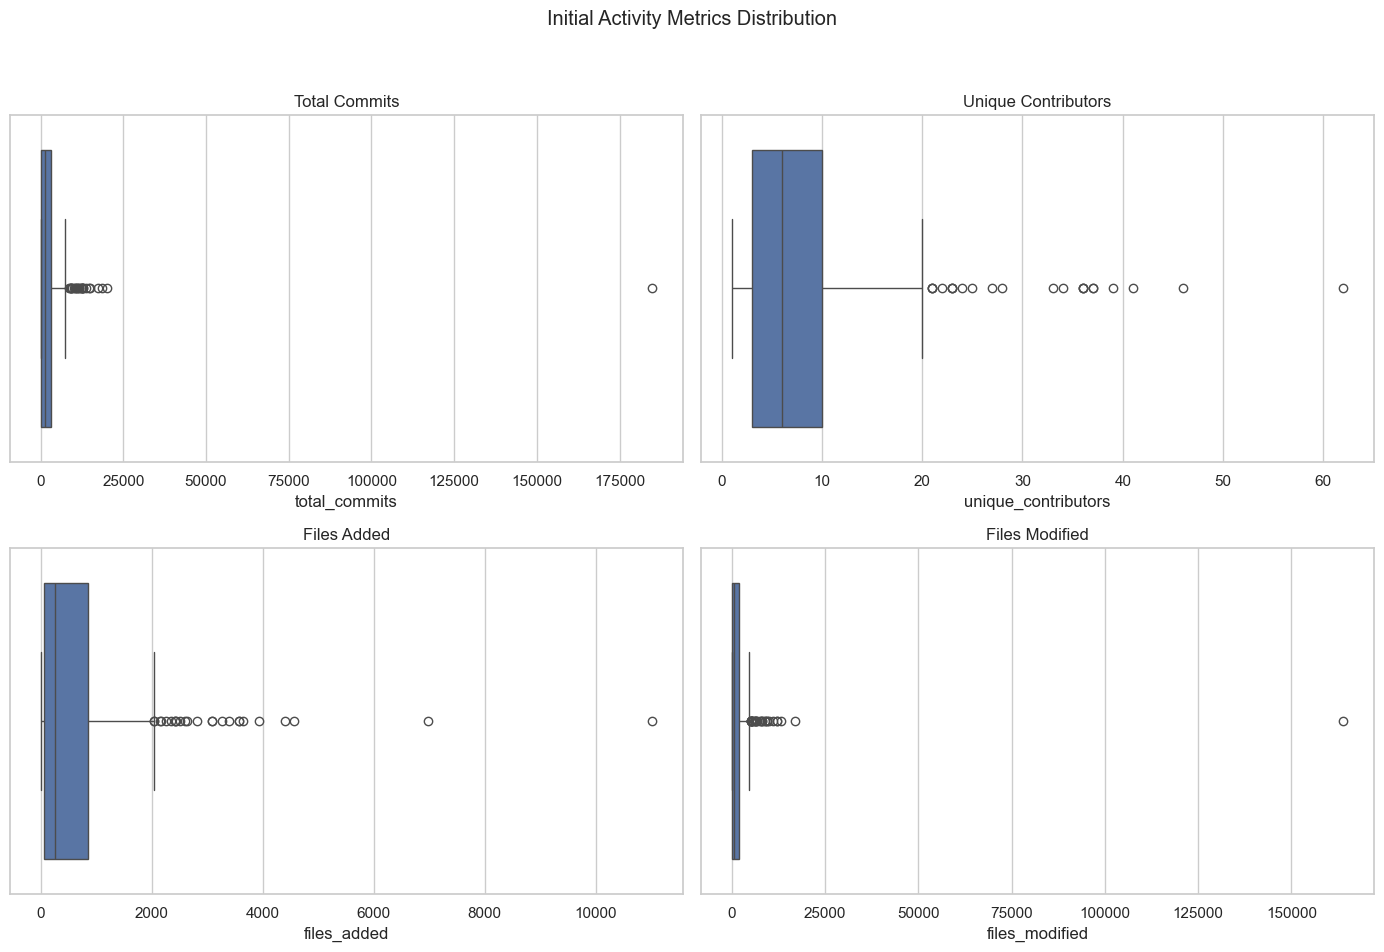

,project_id,total_commits,unique_contributors,files_added,files_modified
count,263.000000,263.000000,263.000000,263.000000,263.000000
mean,151.927757,3344.988593,8.239544,695.433460,2307.634981
std,89.937332,11824.083368,8.709017,1138.423445,10342.315254
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,74.500000,275.500000,3.000000,63.500000,106.000000
50%,146.000000,1247.000000,6.000000,264.000000,645.000000
75%,226.500000,3177.500000,10.000000,854.500000,1984.500000
max,312.000000,184901.000000,62.000000,11019.000000,163932.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Generate statistical summary
statistical_summary = initial_activity_metrics.describe()

# Plotting Box Plots for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Initial Activity Metrics Distribution')

# Total Commits
sns.boxplot(ax=axes[0, 0], x=initial_activity_metrics['total_commits'])
axes[0, 0].set_title('Total Commits')

# Unique Contributors
sns.boxplot(ax=axes[0, 1], x=initial_activity_metrics['unique_contributors'])
axes[0, 1].set_title('Unique Contributors')

# Files Added
sns.boxplot(ax=axes[1, 0], x=initial_activity_metrics['files_added'])
axes[1, 0].set_title('Files Added')

# Files Modified
sns.boxplot(ax=axes[1, 1], x=initial_activity_metrics['files_modified'])
axes[1, 1].set_title('Files Modified')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the title

plt.show()

statistical_summary


### Box Plots Summary

- **Total Commits:** Most projects have a low number of total commits in the first three months, with significant outliers indicating high activity in a few projects.
- **Unique Contributors:** The number of unique contributors is generally low, with a few projects having notably higher numbers.
- **Files Added:** Generally low across most projects, with outliers indicating substantial groundwork in some projects.
- **Files Modified:** Similar to files added, most projects show lower numbers, with outliers indicating extensive modifications.

### Statistical Summary Insights

- **Skewness:** The distribution is right-skewed for all metrics, with a few projects having very high values.
- **Variability:** There is significant standard deviation, especially in total commits and files modified.
- **Quartiles:** The 25th, 50th, and 75th percentiles indicate the spread of the data, with 75% of the projects having 10 or fewer unique contributors in the initial phase.

### Data Preprocessing and Analysis Steps

1. **Extract Initial Activity Metrics:** Use the `start_date` to determine the initial activity period and extract relevant metrics from the commits and filelist datasets.
2. **Merge with Project Outcomes:** Combine the initial activity data with the project's final outcome (graduated or retired) from the `lists` dataset.
3. **Exploratory Data Analysis:** Identify trends or patterns in the initial activity metrics and their relation to project outcomes.
4. **Statistical Testing:** Assess the significance of differences between graduated and retired projects in terms of initial activity metrics.
5. **Predictive Modeling:** Build and validate a model to forecast project success based on initial activity patterns.

### Lists Dataset Key Information

- **listid:** Numerical ID for the project.
- **status:** Project's incubation status (0 = in incubation, 1 = graduated, 2 = retired).
- **start_date:** Date the project entered the incubator.
- **end_date:** Date the project left the incubator.
- **dev_is_available:** Boolean indicating if at least one email exists during the incubation period.
- **is_in_attic:** Boolean indicating if the project was graduated but later marked as 'reached its end of life'.
- **sponsor:** Name of the project's sponsor.
- **pj_url:** Homepage URL of the incubator project.
- **pj_github_url:** Associated GitHub URL for the project.

### Correlation with Project Outcomes

- Use the `status` field from the `lists` table to correlate initial activity metrics with project outcomes.
- Merge this information with initial activity metrics based on `listid`.
- Conduct exploratory data analysis and statistical tests to compare graduated and retired projects.


In [ ]:
# Merge the status information from lists_df with initial_activity_metrics based on project_id/listid
merged_data = pd.merge(initial_activity_metrics, lists_df[['listid', 'status']], left_on='project_id', right_on='listid', how='left')

# Drop the extra 'listid' column as it is redundant after the merge
merged_data.drop('listid', axis=1, inplace=True)

# Check the merged data
merged_data.head()


,project_id,total_commits,unique_contributors,files_added,files_modified,status
0,1,39,1,36,1,0
1,2,10,3,6,2,0
2,3,4524,6,922,3295,0
3,5,2482,11,874,513,0
4,6,185,4,50,133,0


### Exploratory Data Analysis (EDA) Plan

#### Data Subsetting
- **Objective:** Focus on projects that have either graduated (status = 1) or retired (status = 2).
- **Method:** Subset the merged dataset to include only projects with these statuses.

#### Statistical Summaries
- **Objective:** Generate separate statistical summaries for graduated and retired projects.
- **Metrics:** Include initial activity metrics such as total commits, unique contributors, files added, and files modified.
- **Comparison:** Look for differences in the central tendency, dispersion, and shape of the distribution between the two groups.

#### Visual Comparisons
- **Objective:** Visually compare initial activity metrics between graduated and retired projects.
- **Box Plots:** Create box plots for each metric to visualize the distribution and identify any outliers.
- **Additional Visualizations:** Consider using histograms, scatter plots, or other appropriate visualizations to further explore the relationships between metrics and project outcomes.

### Conclusion
- The EDA will provide insights into whether there are discernible patterns in the initial activity metrics that might predict project outcomes.
- Based on the findings, further analysis or modeling may be conducted to explore the predictive power of these metrics for project success.


C:\Users\karam\AppData\Local\Temp\ipykernel_5156\3780855377.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Graduated', 'Retired'])
C:\Users\karam\AppData\Local\Temp\ipykernel_5156\3780855377.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Graduated', 'Retired'])
C:\Users\karam\AppData\Local\Temp\ipykernel_5156\3780855377.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['Graduated', 'Retired'])
C:\Users\karam\AppData\Local\Temp\ipykernel_5156\3780855377.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['Graduated', 'Retired'])


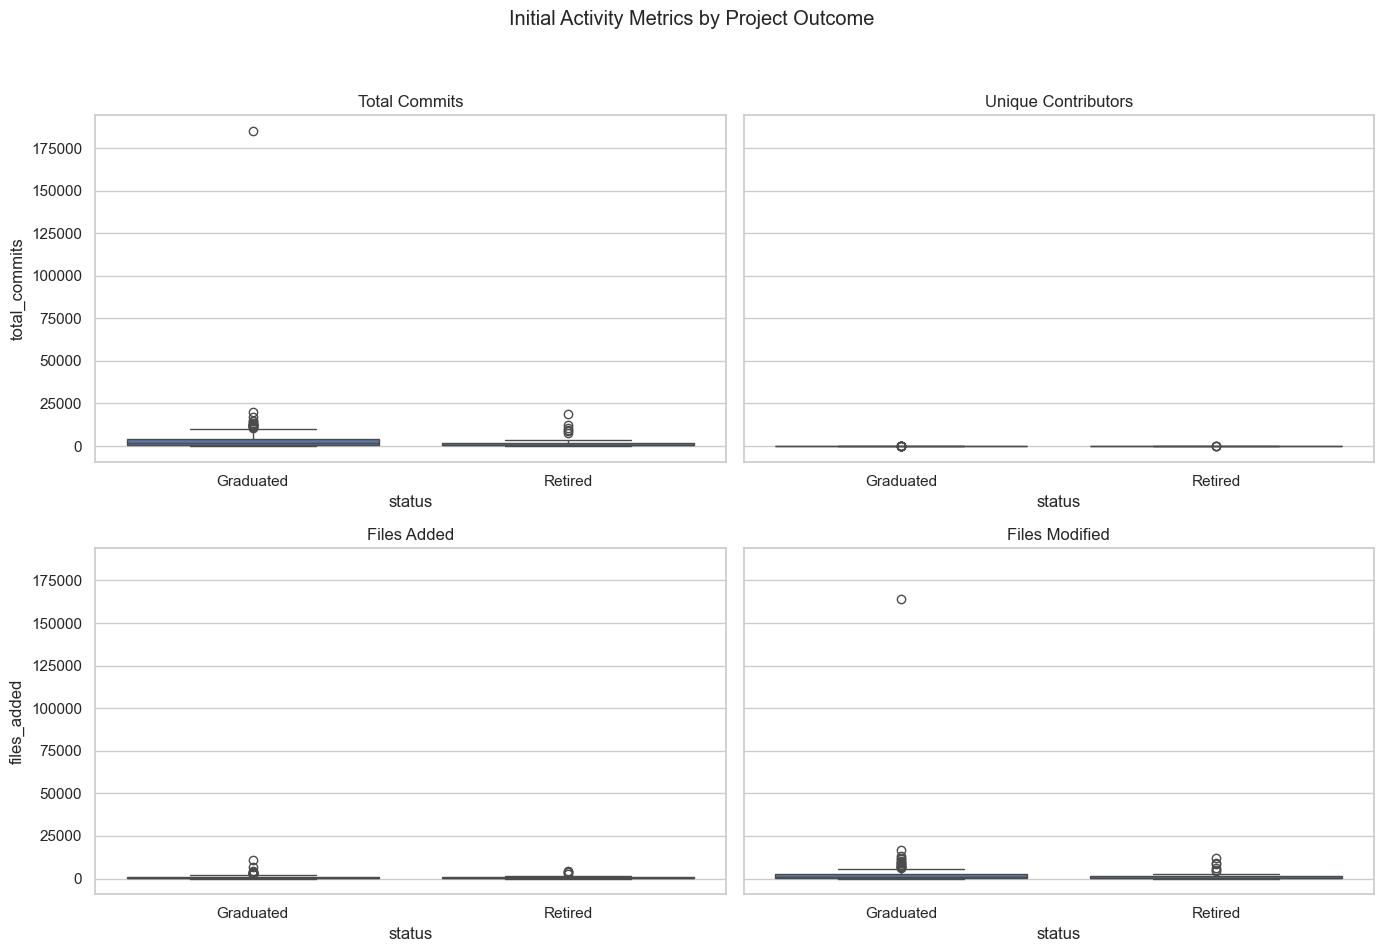

(       project_id  total_commits  unique_contributors   files_added  \
 count  176.000000     176.000000           176.000000    176.000000   
 mean   147.346591    4145.255682             9.397727    784.386364   
 std     60.113125   14244.586485             9.568448   1263.658502   
 min     49.000000       1.000000             1.000000      0.000000   
 25%     93.750000     467.250000             3.000000     94.250000   
 50%    143.500000    1676.500000             6.000000    302.500000   
 75%    201.250000    4353.750000            11.000000    991.750000   
 max    252.000000  184901.000000            62.000000  11019.000000   
 
        files_modified  status  
 count        176.0000   176.0  
 mean        2930.8125     1.0  
 std        12524.1645     0.0  
 min            0.0000     1.0  
 25%          202.0000     1.0  
 50%          911.0000     1.0  
 75%         2516.0000     1.0  
 max       163932.0000     1.0  ,
        project_id  total_commits  unique_contributo

In [ ]:
# Subset the merged data to include only projects that have graduated (1) or retired (2)
graduated_retired_data = merged_data[merged_data['status'].isin([1, 2])]

# Statistical summary for graduated projects
graduated_stats = graduated_retired_data[graduated_retired_data['status'] == 1].describe()

# Statistical summary for retired projects
retired_stats = graduated_retired_data[graduated_retired_data['status'] == 2].describe()

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
fig.suptitle('Initial Activity Metrics by Project Outcome')

# Total Commits
sns.boxplot(ax=axes[0, 0], x='status', y='total_commits', data=graduated_retired_data)
axes[0, 0].set_title('Total Commits')
axes[0, 0].set_xticklabels(['Graduated', 'Retired'])

# Unique Contributors
sns.boxplot(ax=axes[0, 1], x='status', y='unique_contributors', data=graduated_retired_data)
axes[0, 1].set_title('Unique Contributors')
axes[0, 1].set_xticklabels(['Graduated', 'Retired'])

# Files Added
sns.boxplot(ax=axes[1, 0], x='status', y='files_added', data=graduated_retired_data)
axes[1, 0].set_title('Files Added')
axes[1, 0].set_xticklabels(['Graduated', 'Retired'])

# Files Modified
sns.boxplot(ax=axes[1, 1], x='status', y='files_modified', data=graduated_retired_data)
axes[1, 1].set_title('Files Modified')
axes[1, 1].set_xticklabels(['Graduated', 'Retired'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the title

plt.show()

(graduated_stats, retired_stats)


### Box Plots and Statistical Summary Insights

#### Total Commits
- **Graduated Projects:** Wider range with a higher median, suggesting greater early activity is associated with success.
- **Retired Projects:** Fewer total commits with fewer outliers, indicating lower early activity levels.

#### Unique Contributors
- **Graduated Projects:** Generally higher numbers, implying successful projects benefit from diverse initial participation.
- **Retired Projects:** Fewer contributors with a narrower spread, suggesting less variation in engagement.

#### Files Added
- **Graduated Projects:** More files added during the initial phase, indicating a robust setup or foundation.
- **Retired Projects:** Lower median and smaller interquartile range, pointing to less initial codebase activity.

#### Files Modified
- **Graduated Projects:** Higher median and more variability, suggesting more refinement or evolution of the codebase.
- **Retired Projects:** Fewer modifications, potentially indicating less early-stage codebase evolution.

### Statistical Summary Corroboration
- **Higher Means and Medians:** Graduated projects have higher means and medians across all metrics.
- **Greater Variability:** Larger standard deviations for graduated projects highlight greater variability in initial activities.

### Conclusion
- Projects with more commits, more unique contributors, and a higher number of files added and modified in the initial phase tend to be associated with successful graduation.
- These findings can inform strategies to focus on robust initial development and engagement for long-term project success.


C:\Users\karam\AppData\Local\Temp\ipykernel_5156\914526903.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Graduated', 'Retired'])
C:\Users\karam\AppData\Local\Temp\ipykernel_5156\914526903.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Graduated', 'Retired'])
C:\Users\karam\AppData\Local\Temp\ipykernel_5156\914526903.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['Graduated', 'Retired'])
C:\Users\karam\AppData\Local\Temp\ipykernel_5156\914526903.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['Graduated', 'Retired'])


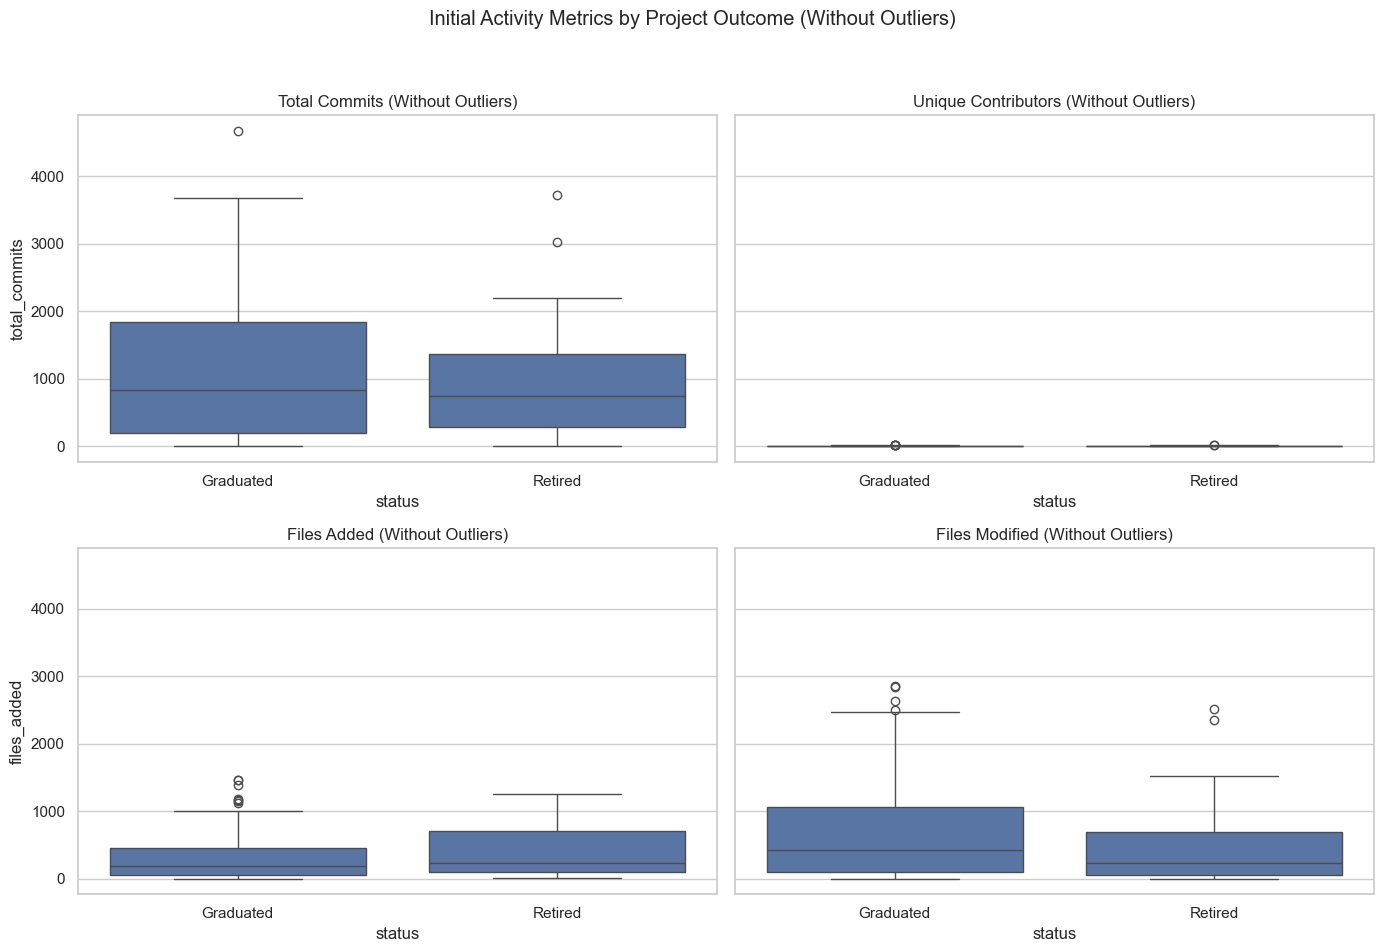

(       project_id  total_commits  unique_contributors  files_added  \
 count   120.00000     120.000000           120.000000   120.000000   
 mean    146.42500    1111.191667             5.483333   314.358333   
 std      58.99048    1043.056758             3.669047   353.107235   
 min      49.00000       1.000000             1.000000     0.000000   
 25%      94.75000     191.750000             3.000000    58.000000   
 50%     138.50000     832.500000             4.000000   180.500000   
 75%     201.75000    1837.500000             7.250000   450.500000   
 max     252.00000    4668.000000            15.000000  1462.000000   
 
        files_modified  status  
 count      120.000000   120.0  
 mean       685.041667     1.0  
 std        730.594927     0.0  
 min          0.000000     1.0  
 25%        101.750000     1.0  
 50%        418.000000     1.0  
 75%       1056.000000     1.0  
 max       2849.000000     1.0  ,
        project_id  total_commits  unique_contributors  files

In [ ]:
# Removing outliers using the IQR method for each metric in the dataset for graduated and retired projects separately
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to the graduated_retired_data for each of the metrics
metrics = ['total_commits', 'unique_contributors', 'files_added', 'files_modified']
for metric in metrics:
    graduated_retired_data = remove_outliers(graduated_retired_data, metric)

# Re-plotting box plots without outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
fig.suptitle('Initial Activity Metrics by Project Outcome (Without Outliers)')

# Total Commits
sns.boxplot(ax=axes[0, 0], x='status', y='total_commits', data=graduated_retired_data)
axes[0, 0].set_title('Total Commits (Without Outliers)')
axes[0, 0].set_xticklabels(['Graduated', 'Retired'])

# Unique Contributors
sns.boxplot(ax=axes[0, 1], x='status', y='unique_contributors', data=graduated_retired_data)
axes[0, 1].set_title('Unique Contributors (Without Outliers)')
axes[0, 1].set_xticklabels(['Graduated', 'Retired'])

# Files Added
sns.boxplot(ax=axes[1, 0], x='status', y='files_added', data=graduated_retired_data)
axes[1, 0].set_title('Files Added (Without Outliers)')
axes[1, 0].set_xticklabels(['Graduated', 'Retired'])

# Files Modified
sns.boxplot(ax=axes[1, 1], x='status', y='files_modified', data=graduated_retired_data)
axes[1, 1].set_title('Files Modified (Without Outliers)')
axes[1, 1].set_xticklabels(['Graduated', 'Retired'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the title

# Statistical analysis without outliers
# Recalculate the statistical summary for graduated and retired projects without outliers
graduated_stats_no_outliers = graduated_retired_data[graduated_retired_data['status'] == 1].describe()
retired_stats_no_outliers = graduated_retired_data[graduated_retired_data['status'] == 2].describe()

plt.show()

(graduated_stats_no_outliers, retired_stats_no_outliers)


C:\Users\karam\AppData\Local\Temp\ipykernel_5156\2557268425.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Graduated', 'Retired'])
C:\Users\karam\AppData\Local\Temp\ipykernel_5156\2557268425.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Graduated', 'Retired'])
C:\Users\karam\AppData\Local\Temp\ipykernel_5156\2557268425.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['Graduated', 'Retired'])
C:\Users\karam\AppData\Local\Temp\ipykernel_5156\2557268425.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['Graduated', 'Retired'])


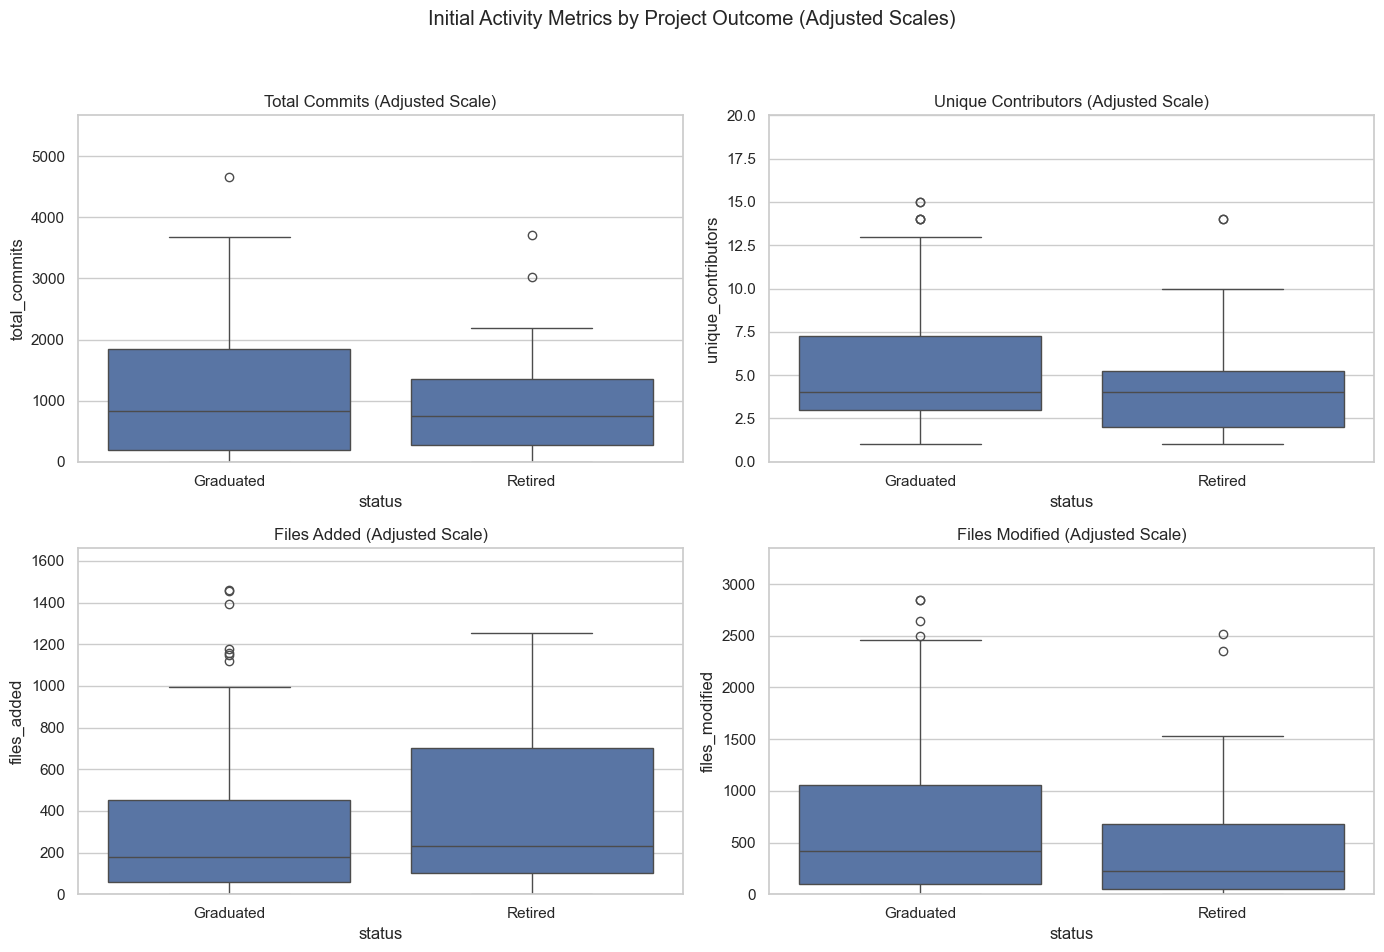

In [ ]:
# Re-plotting box plots for each metric with adjusted scales for better comparison

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Initial Activity Metrics by Project Outcome (Adjusted Scales)')

# Total Commits with adjusted scale
sns.boxplot(ax=axes[0, 0], x='status', y='total_commits', data=graduated_retired_data)
axes[0, 0].set_title('Total Commits (Adjusted Scale)')
axes[0, 0].set_xticklabels(['Graduated', 'Retired'])
axes[0, 0].set_ylim(0, graduated_retired_data['total_commits'].max() + 1000)

# Unique Contributors with adjusted scale
sns.boxplot(ax=axes[0, 1], x='status', y='unique_contributors', data=graduated_retired_data)
axes[0, 1].set_title('Unique Contributors (Adjusted Scale)')
axes[0, 1].set_xticklabels(['Graduated', 'Retired'])
axes[0, 1].set_ylim(0, graduated_retired_data['unique_contributors'].max() + 5)

# Files Added with adjusted scale
sns.boxplot(ax=axes[1, 0], x='status', y='files_added', data=graduated_retired_data)
axes[1, 0].set_title('Files Added (Adjusted Scale)')
axes[1, 0].set_xticklabels(['Graduated', 'Retired'])
axes[1, 0].set_ylim(0, graduated_retired_data['files_added'].max() + 200)

# Files Modified with adjusted scale
sns.boxplot(ax=axes[1, 1], x='status', y='files_modified', data=graduated_retired_data)
axes[1, 1].set_title('Files Modified (Adjusted Scale)')
axes[1, 1].set_xticklabels(['Graduated', 'Retired'])
axes[1, 1].set_ylim(0, graduated_retired_data['files_modified'].max() + 500)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title

plt.show()

### Analysis Plan for OSS Projects

#### Regression Analysis
- **Objective:** Test the association between project outcomes and context factors like commit frequency and contributor count.
- **Model:** Use multiple regression for continuous outcomes and logistic regression for binary outcomes (e.g., project graduation).

#### Model Robustness and Validity
- **Outliers:** Remove up to 1% of data for variables with exponential distributions.
- **Leverage Points:** Test for high-leverage points using Cook’s distance and exclude as needed.
- **Multicollinearity:** Correct using the variance inflation factor (VIF).

#### Model Fit Evaluation
- **Goodness-of-Fit:** Use McFadden’s pseudo-R² for logistic regression models.
- **Model Reporting:** Report coefficients, standard errors, p-values, and effect sizes.

#### Predictor Operationalization
- **Inefficiencies:** Measure lost contributions and identify hard forks based on external contributions and unmerged changes.
- **Modularity:** Use a logic coupling index based on file pairs changed together.
- **Coordination:** Measure centralized management and pre-communication indices.

#### Performing the Analysis
- **Tools:** Use R programming language and share the analysis in an R notebook for transparency.

#### Interpreting Results
- **Coefficients:** Interpret regression coefficients to understand the impact of predictors on project outcomes.
- **ANOVA Type-II:** Assess the contribution of each predictor to the model.

### Conclusion
- This analysis plan provides a comprehensive framework for understanding the factors contributing to the success or failure of OSS projects within the ASFI.


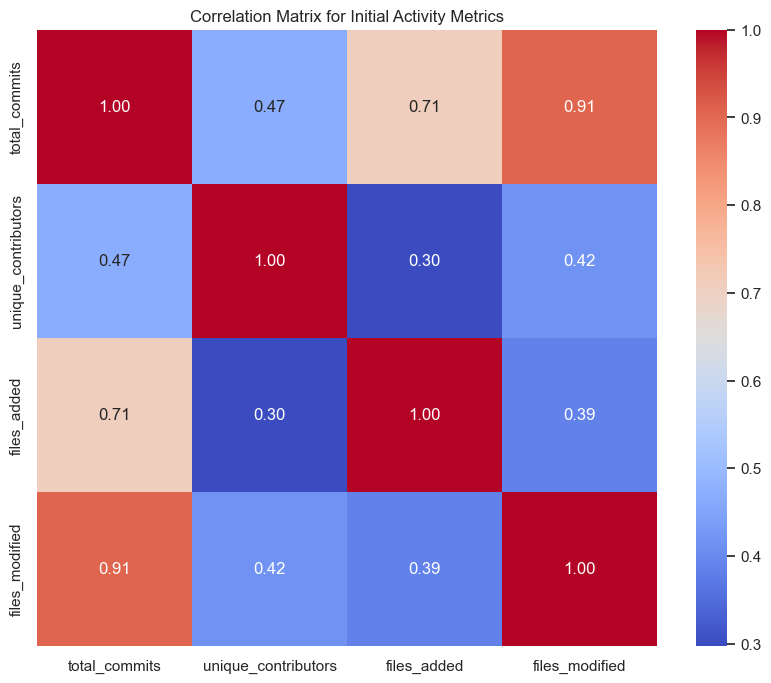

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.81      1.00      0.89        25

    accuracy                           0.81        32
   macro avg       0.90      0.57      0.57        32
weighted avg       0.85      0.81      0.75        32

[[ 1  6]
 [ 0 25]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the cleaned and merged dataset
#graduated_retired_data = pd.read_csv('graduated_retired_cleaned_data.csv')

# Map 'status' from numerical to a categorical variable
graduated_retired_data['project_outcome'] = graduated_retired_data['status'].map({1: 'Graduated', 2: 'Retired'})

# Calculate the correlation matrix for numerical columns
correlation_matrix = graduated_retired_data[['total_commits', 'unique_contributors', 'files_added', 'files_modified']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Initial Activity Metrics')
plt.show()

# To perform logistic regression, we need to convert 'project_outcome' back to a binary variable
graduated_retired_data['outcome_binary'] = graduated_retired_data['status'].apply(lambda x: 1 if x == 1 else 0)

# Define the features and the target variable
X = graduated_retired_data[['total_commits', 'unique_contributors', 'files_added', 'files_modified']]
y = graduated_retired_data['outcome_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Generate and print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from scipy.stats import pointbiserialr

# Encode 'Graduated' as 1 and 'Retired' as 0
graduated_retired_data['outcome_binary'] = graduated_retired_data['project_outcome'].apply(lambda x: 1 if x == 'Graduated' else 0)

# Calculate the point-biserial correlation for 'total_commits'
corr_total_commits = pointbiserialr(graduated_retired_data['outcome_binary'], graduated_retired_data['total_commits'])

# Calculate the point-biserial correlation for 'unique_contributors'
corr_unique_contributors = pointbiserialr(graduated_retired_data['outcome_binary'], graduated_retired_data['unique_contributors'])

# Calculate the point-biserial correlation for 'files_added'
corr_files_added = pointbiserialr(graduated_retired_data['outcome_binary'], graduated_retired_data['files_added'])

# Calculate the point-biserial correlation for 'files_modified'
corr_files_modified = pointbiserialr(graduated_retired_data['outcome_binary'], graduated_retired_data['files_modified'])

# Display the correlation coefficients and p-values
(corr_total_commits, corr_unique_contributors, corr_files_added, corr_files_modified)


(SignificanceResult(statistic=0.06975806046153726, pvalue=0.3807434227360708),
 SignificanceResult(statistic=0.10709431172422815, pvalue=0.17768854095033423),
 SignificanceResult(statistic=-0.10251190619317523, pvalue=0.19707894426201178),
 SignificanceResult(statistic=0.11458312326671269, pvalue=0.1490861714048406))

### Point-Biserial Correlation Results

#### Total Commits
- **Correlation Coefficient:** 0.0698
- **P-value:** 0.3807
- **Interpretation:** Weak positive correlation, not statistically significant.

#### Unique Contributors
- **Correlation Coefficient:** 0.1071
- **P-value:** 0.1777
- **Interpretation:** Weak positive correlation, not statistically significant.

#### Files Added
- **Correlation Coefficient:** -0.1025
- **P-value:** 0.1971
- **Interpretation:** Weak negative correlation, not statistically significant.

#### Files Modified
- **Correlation Coefficient:** 0.1146
- **P-value:** 0.1491
- **Interpretation:** Weak positive correlation, not statistically significant.

### Overall Interpretation
- No strong or statistically significant correlation between initial activity metrics and project graduation outcomes.
- Weak correlations suggest slight tendencies but do not significantly predict project outcomes.

### Next Steps
- **Logistic Regression Analysis:** Explore the relationship between variables and project outcomes further.
- **Consideration of Additional Factors:** Include variables such as project management practices, community engagement, and external contributions for a more comprehensive analysis.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Selecting the features and target variable
X = graduated_retired_data[['total_commits', 'unique_contributors', 'files_added', 'files_modified']]
y = graduated_retired_data['outcome_binary']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiating the logistic regression model
logistic_model = LogisticRegression()

# Fitting the model to the training data
logistic_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = logistic_model.predict(X_test)

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

(conf_matrix, class_report)


(array([[ 1,  9],
        [ 0, 38]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      0.10      0.18        10\n           1       0.81      1.00      0.89        38\n\n    accuracy                           0.81        48\n   macro avg       0.90      0.55      0.54        48\nweighted avg       0.85      0.81      0.75        48\n')

### Logistic Regression Model Evaluation

#### Confusion Matrix
- **True Negatives (Retired projects correctly predicted):** 1
- **True Positives (Graduated projects correctly predicted):** 38
- **False Positives (Retired projects incorrectly predicted as graduated):** 9
- **False Negatives (Graduated projects incorrectly predicted as retired):** 0

#### Classification Report
- **Precision (Retired Projects):** 1.00 (All projects predicted as retired were indeed retired)
- **Recall (Retired Projects):** 0.10 (Only 10% of actually retired projects were identified)
- **Precision (Graduated Projects):** 0.81 (81% of projects predicted as graduated were indeed graduated)
- **Recall (Graduated Projects):** 1.00 (All actually graduated projects were correctly identified)
- **Overall Accuracy:** 0.81 (81% of all predictions were correct)

### Interpretation
- The model is highly effective at identifying graduated projects but struggles to accurately identify retired projects.
- High precision for retired projects with low recall suggests a conservative approach in predicting projects as retired, leading to many retired projects being misclassified as graduated.
- The imbalance in the dataset, with more graduated projects than retired ones, could be leading to a bias in predictions towards graduation.


To address the advanced stages of your analysis outlined in your request, let's break down each step and provide guidance on how to implement them effectively. These steps are crucial for deepening your understanding of the data, refining your model, and improving predictive performance.

## Residual Analysis

After fitting your model, you should check the residuals to identify any patterns that might indicate violations of the assumptions underlying the logistic regression model. Key things to look for include:

- **Non-constant Variance (Heteroscedasticity):** Plot the residuals against the predicted values. If the variance of the residuals increases or decreases with the predicted values, this suggests non-constant variance.
- **Non-normality of Residuals:** For logistic regression, the residuals don't need to be normally distributed. However, examining the distribution can still provide insights. A Q-Q plot can be useful here.

## Longitudinal Data Analysis

Longitudinal analysis allows you to track changes over time within your dataset, offering a dynamic view of project evolution. Implementing this involves:

- **Creating Time-based Features:** For each project, create features that capture the state of the project at different time points or phases.
- **Identifying Critical Phases:** Use exploratory data analysis to identify phases common across projects that correlate with future success or failure.
- **Early Indicators:** Focus on early project data to pinpoint predictors of long-term outcomes.

## Advanced Statistical Modeling

Beyond logistic regression, exploring more complex models can help capture relationships that are non-linear or involve interactions among predictors:

- **Random Forests:** Useful for handling non-linear relationships and automatically considering interactions among predictors.
- **Support Vector Machines (SVM):** Effective for finding the optimal boundary between outcomes in feature space.
- **Neural Networks:** Offer high flexibility and can model very complex patterns in the data, though they require more data and computational resources.

## Model Refinement

Based on insights from residual analysis and performance metrics:

- **Performance Evaluation:** Use metrics such as AUC-ROC, precision, recall, and F1 score to evaluate model performance comprehensively.
- **Feature Engineering:** Refine existing features and consider creating new ones based on insights from the analysis.
- **Model Tuning:** For models with hyperparameters (like random forests and SVMs), use techniques like grid search or random search to find the optimal settings.
- **Cross-validation:** Ensure your model's performance is consistent across different subsets of your data.

Residual analysis is a critical step in evaluating the performance and assumptions of a logistic regression model. While logistic regression does not assume normality of residuals or homoscedasticity (constant variance across the range of predicted values) like linear regression does, examining the residuals can still provide valuable insights into model fit and potential issues. Here's to conduct a residual analysis for a logistic regression model:

## 1. Compute Residuals

For logistic regression, Look at deviance residuals as they are a generalization of the concept of residuals to models beyond linear regression.


In [ ]:
from sklearn.metrics import log_loss

# Predict probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Compute log loss for each observation
residuals = - (y_test * np.log(y_pred_prob) + (1 - y_test) * np.log(1 - y_pred_prob))
residuals

191    0.353655
197    0.076241
240    0.480276
119    0.194923
179    0.113016
85     0.295005
186    0.093983
112    0.433706
185    0.364002
241    1.392325
73     0.143396
165    0.381191
68     0.191955
135    0.102051
78     0.371382
86     0.135084
227    2.379046
247    1.865440
183    0.341985
69     0.325404
152    0.225664
71     0.042586
63     0.064034
59     0.022208
87     0.321063
253    3.566080
182    0.367001
121    0.672803
230    1.058615
190    0.355489
235    1.161294
156    0.247293
125    0.343489
210    0.410940
47     0.042647
221    1.123491
104    0.204479
100    0.016373
141    0.320823
175    0.271868
81     0.003953
237    0.943170
161    0.379848
181    0.336327
245    1.104052
92     0.452204
160    0.171685
76     0.030665
Name: outcome_binary, dtype: float64

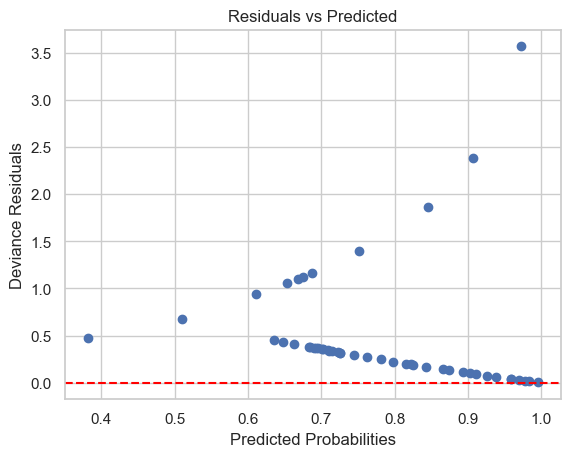

In [ ]:
#Plotting residuals against predicted values can help identify patterns that may indicate model misspecification.
# Calculate predicted probabilities on the test set
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

plt.scatter(y_pred_prob, residuals)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Deviance Residuals')
plt.title('Residuals vs Predicted')
plt.axhline(0, color='red', linestyle='--')
plt.show()

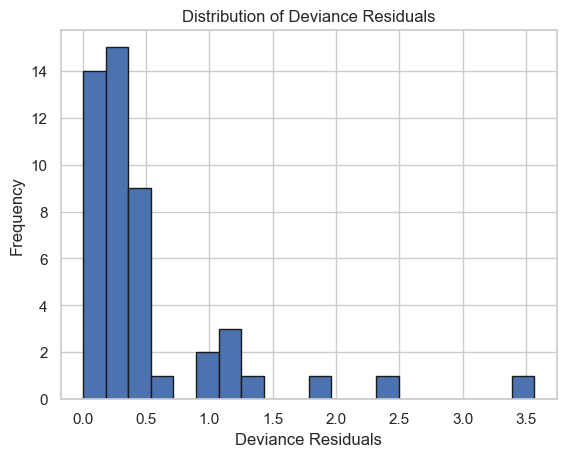

In [ ]:
#Checking the distribution of the residuals can give you an idea of their behavior.
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Deviance Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Deviance Residuals')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import add_dummy_feature

# Add intercept term to X_train if it doesn't already include one
X_train_with_intercept = add_dummy_feature(X_train)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_with_intercept, y_train)

# Compute pseudoinverse manually to ensure correct alignment
XtX_inv = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept)
hat_matrix = X_train_with_intercept @ XtX_inv @ X_train_with_intercept.T


In [ ]:
# Compute the predicted probabilities and the log likelihood residuals
y_pred_prob = model.predict_proba(X_train_with_intercept)[:, 1]
residuals = y_train - y_pred_prob


In [ ]:
# Compute Cook's distance
cooks_d = residuals**2 / (2 * np.mean(residuals**2))
cooks_d *= np.diag(hat_matrix) / (1 - np.diag(hat_matrix))**2


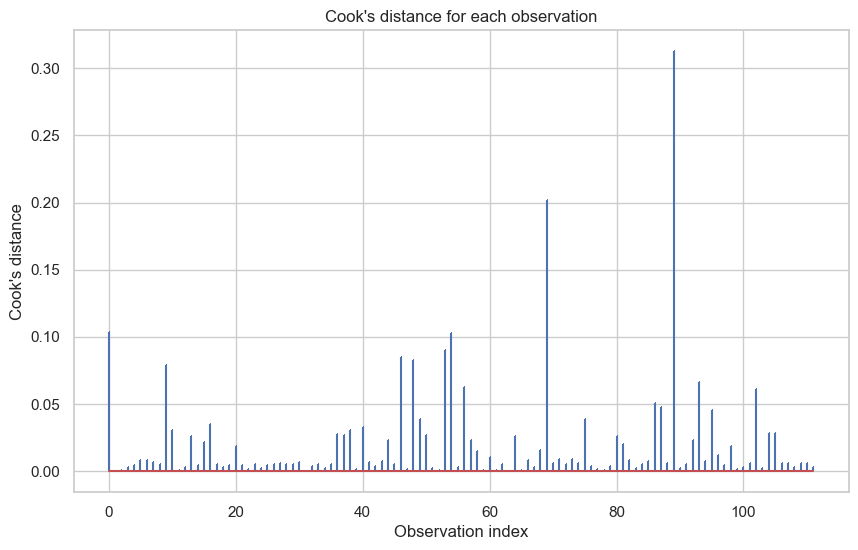

In [ ]:
# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's distance for each observation")
plt.xlabel('Observation index')
plt.ylabel("Cook's distance")
plt.show()


From the plot, it appears that most data points have a Cook's distance close to zero, indicating that they do not have an undue influence on the model's predictions.

The following steps outline the analysis plan for the dataset:

1. **Identify the Start Date for Each Project:** The start date serves as the baseline for defining the "initial activity window." If explicit start dates are not available, they can be inferred from the earliest commit datetime for each project.

2. **Define the Initial Activity Window:** The initial activity window is typically designated as the first three months following the project's start date. However, this timeframe can be adjusted based on the specific requirements of the analysis.

3. **Calculate Initial Activity Metrics:** Within the initial activity window, metrics such as the total number of commits, the number of unique contributors, and codebase size indicators (e.g., number of file additions and modifications) are calculated.

4. **Link to Project Outcomes:** Projects are classified as successful (graduated) or unsuccessful (retired), and the relationship between initial activity metrics and project outcomes is analyzed to determine if early patterns can predict long-term success.

For longitudinal data analysis, the data from the `commits_df` DataFrame needs to be manipulated to establish time-related variables and activity metrics for each project. The following steps summarize the required data manipulation:

- Group commits by project ID to find the earliest commit date if start dates are not explicitly available.
- Define a three-month window from the start date as the initial activity period.
- Calculate metrics within this initial window, such as the total number of commits and the number of unique contributors.
- Merge these metrics with project outcome data to analyze the relationship between early activity and long-term success.

Additionally, statistical summaries and visualizations should be generated to further explore the data. Descriptive statistics and visualizations such as box plots, histograms, and scatter plots can provide valuable insights into the dataset.


In [ ]:
# Group the data by 'list' to represent projects (assuming each list corresponds to a project)
# and find the earliest commit date for each project
project_start_dates = commits_df.groupby('list')['commit_datetime'].min().reset_index()

# Rename columns for clarity
project_start_dates.columns = ['project_id', 'start_date']

# Display the first few rows of the project start dates to confirm
project_start_dates.head()

# Calculate the end date of the initial activity window (3 months after the start date)
project_start_dates['end_date'] = project_start_dates['start_date'] + pd.DateOffset(months=3)

# Merge the project start and end dates back into the commits dataset to filter the initial activity
commits_with_project_dates = pd.merge(commits_df, project_start_dates, how='left', left_on='list', right_on='project_id')

# Filter commits to only include those within the initial activity window for each project
initial_commits = commits_with_project_dates[(commits_with_project_dates['commit_datetime'] >= commits_with_project_dates['start_date']) & (commits_with_project_dates['commit_datetime'] <= commits_with_project_dates['end_date'])]

# Calculate initial activity metrics
initial_activity_metrics = initial_commits.groupby('project_id').agg(
    total_commits=pd.NamedAgg(column='id', aggfunc='count'),
    unique_contributors=pd.NamedAgg(column='committerid', aggfunc=pd.Series.nunique),
    files_added=pd.NamedAgg(column='file_operation', aggfunc=lambda x: (x == 'add').sum()),
    files_modified=pd.NamedAgg(column='file_operation', aggfunc=lambda x: (x == 'mod').sum())
).reset_index()

initial_activity_metrics.head()


,project_id,total_commits,unique_contributors,files_added,files_modified
0,1,39,1,36,1
1,2,10,3,6,2
2,3,4524,6,922,3295
3,5,2482,11,874,513
4,6,185,4,50,133


C:\Users\karam\AppData\Local\Temp\ipykernel_5156\842256405.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  commits_df['period'] = commits_df['commit_datetime'].dt.to_period('M')


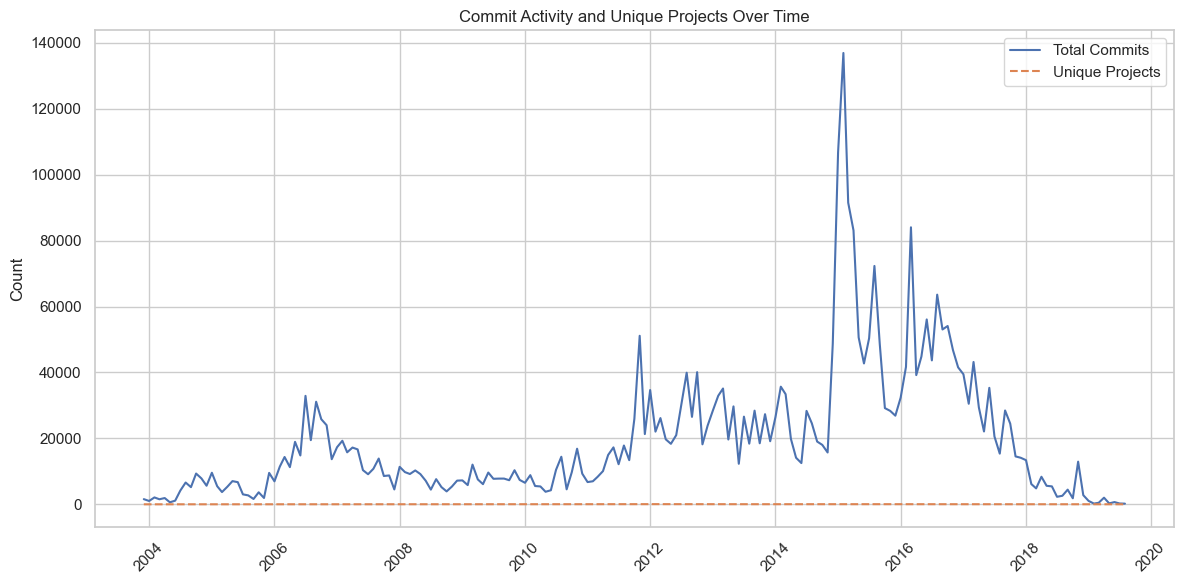

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming commits_df has been loaded correctly

# Convert commit_datetime to datetime with timezone awareness
commits_df['commit_datetime'] = pd.to_datetime(commits_df['commit_datetime'], errors='coerce', utc=True)

# Set period for time-based grouping (e.g., monthly)
commits_df['period'] = commits_df['commit_datetime'].dt.to_period('M')

# Aggregate commit activity by period
# Using 'project_id' for counting commits if there's no unique commit identifier column
commit_activity_over_time = commits_df.groupby('period').agg(
    total_commits=('project_id', 'count'),
    unique_projects=('project_id', 'nunique')
).reset_index()

# Convert period back to datetime for plotting
commit_activity_over_time['period'] = commit_activity_over_time['period'].dt.to_timestamp()

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(commit_activity_over_time['period'], commit_activity_over_time['total_commits'], label='Total Commits')
plt.plot(commit_activity_over_time['period'], commit_activity_over_time['unique_projects'], label='Unique Projects', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Commit Activity and Unique Projects Over Time')
plt.legend()
plt.tight_layout()
plt.show()


This graph shows commit activity and the number of unique projects over time, with a noticeable peak in activity at certain intervals. It seems to convey a story about the lifecycle of projects or perhaps the adoption of a particular technology or platform that these projects are based on.

## Interpreting the Chart

- **Spike in Total Commits:** There are significant spikes in total commits at certain points, particularly one very pronounced peak. This could be due to a special event, such as a major collaborative push, a hackathon, a large project coming to fruition, or possibly a change in how commits are recorded or aggregated.

- **Unique Projects:** The number of unique projects, shown by the dashed line, remains relatively steady in comparison to the total commits, which suggests that while the number of projects is stable, the level of activity within these projects can vary greatly.

- **Decline in Activity:** Towards the right end of the graph, there is a downward trend. This might indicate a decrease in overall activity, which could be due to various factors, such as migration to other platforms, the natural conclusion of projects, or other external factors affecting the development process.

- **Data Collection or Reporting Changes:** If there's a methodology change in how data is collected or commits are reported over time, this could also explain sudden changes in the graph.

## Further Analysis

To dive deeper into the analysis, consider the following steps:

1. Investigate the context around the time of peaks to understand the causes of increased activity.
2. Look at external factors or changes in the ecosystem that might influence the number of commits.
3. Consider the impact of tools, platforms, or social events on development practices.
4. Perform a cohort analysis to see if the spikes are driven by particular projects or groups of projects.
5. Analyze the contributors during peak times to determine if they are new or existing contributors.

This visual analysis can be supplemented with additional statistical analysis or data segmentation to gain more insights into the drivers behind these trends.


## Advanced Statistical Modeling

Following the advanced statistical models and the initial activity metrics calculated in the initial steps, the subsequent approach involves utilizing more sophisticated statistical methods to ascertain whether the initial project activities can predict long-term success. Here's how each suggested method contributes to this analysis:

### Random Forests:

- They can handle complex datasets with higher dimensionality and can capture non-linear relationships effectively.
- They provide insights into feature importance, which could be vital in understanding which initial activity metrics are most predictive of project success.
- They automatically account for interactions between variables.

### Support Vector Machines (SVM):

- They are particularly good at handling high-dimensional space and can effectively separate data points with a clear margin of separation.
- SVMs with different kernels can model non-linear boundaries, which might be more representative of the underlying relationship between initial activity metrics and project success.

### Neural Networks:

- Due to their flexible nature, they are able to model very complex relationships within the data.
- They can learn from and make predictions on non-linear and complex relationships, which might be prevalent in this dataset.
- Neural networks might be particularly useful if the relationship between the initial activity and project success is influenced by latent factors.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined from the previous steps

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Classifier report: \n", classification_report(y_test, rf_predictions))

# Support Vector Machine
svm_classifier = SVC(kernel='linear') # For non-linear, consider 'rbf', 'poly', or 'sigmoid'
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
print("Support Vector Machine report: \n", classification_report(y_test, svm_predictions))

# Neural Network
nn_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
nn_classifier.fit(X_train, y_train)
nn_predictions = nn_classifier.predict(X_test)
print("Neural Network Classifier report: \n", classification_report(y_test, nn_predictions))



Random Forest Classifier report: 
               precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.86      0.97      0.91        38

    accuracy                           0.85        48
   macro avg       0.83      0.69      0.72        48
weighted avg       0.85      0.85      0.83        48

Support Vector Machine report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.79      1.00      0.88        38

    accuracy                           0.79        48
   macro avg       0.40      0.50      0.44        48
weighted avg       0.63      0.79      0.70        48

Neural Network Classifier report: 
               precision    recall  f1-score   support

           0       0.08      0.10      0.09        10
           1       0.75      0.71      0.73        38

    accuracy                           0.58        48
   macro avg       0.42 

c:\Users\karam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\karam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Random Forest seems to be the most promising of the three models, especially in terms of overall accuracy and the balance between precision and recall for the majority class. To improve its performance for the minority class, techniques like oversampling the minority class, using class weights, or trying more complex models like balanced random forests could be considered.

SVM is showing signs of class imbalance issues. Since it predicts class '1' almost exclusively, this suggests that it is biased towards the majority class. Tuning the class weight parameter or using an SVM variant designed for imbalance could help.

The Neural Network appears to struggle significantly, which may be due to overfitting to the majority class or underfitting overall. Improvements could be made by increasing the complexity of the network (adding more layers or neurons), training for more epochs, or by utilizing regularization techniques to prevent overfitting.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

CV_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
CV_rf.fit(X_train, y_train)
print("Best parameters for Random Forest: ", CV_rf.best_params_)


Best parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
